In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [52]:
#functions
def get_nice_corr_matrix(data: pd.DataFrame):
    corr_matrix=data.corr()
    # mask = np.zeros_like(corr_matrix, dtype=np.bool) Worked for another numpy version
    # mask[np.triu_indices_from(mask)]= True

    # Create a mask with zeros
    mask = np.zeros_like(corr_matrix, dtype=bool)

    # Set upper triangle elements to True
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(15, 15))


    heatmap = sns.heatmap(corr_matrix,
                        mask = mask,
                        square = True,
                        linewidths = .5,
                        cmap = 'coolwarm',
                        cbar_kws = {'shrink': .4,
                                    'ticks' : [-1, -.5, 0, 0.5, 1]},
                        vmin = -1,
                        vmax = 1,
                        annot = True,
                        fmt='.2f',
                        annot_kws = {'size': 15})

    #add the column names as labels
    ax.set_yticklabels(corr_matrix.columns, rotation = 0)
    ax.set_xticklabels(corr_matrix.columns)
    ax.set_title('Correlation matrix')

    sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
    plt.show()

# Regresia multipla pentru estimarea sperantei de viata

In [53]:
df = pd.read_csv('../data/life_expectancy.csv')
df

,Country,Country Code,Region,Life expectancy,GDP per capita,Corruption,Mortality caused by road traffic injury,Health Expenditure %,Education Expenditure %
0,Angola,AGO,Sub-Saharan Africa,61.147,2809.626088,0.361111,26.1,2.533360,1.927457
1,Albania,ALB,Europe & Central Asia,78.573,5395.659532,0.416667,11.7,NaN,3.916650
2,United Arab Emirates,ARE,Middle East & North Africa,77.972,42701.443045,0.666667,8.9,4.275049,3.867370
3,Argentina,ARG,Latin America & Caribbean,76.667,10056.637940,0.409722,14.1,9.510071,4.724170
4,Armenia,ARM,Europe & Central Asia,75.087,4604.646324,0.333333,20.0,11.335264,2.561850
...,...,...,...,...,...,...,...,...,...
123,Uzbekistan,UZB,Europe & Central Asia,71.725,1784.009816,NaN,11.7,5.617604,7.001860
124,Vietnam,VNM,East Asia & Pacific,75.400,2715.275980,0.416667,30.6,5.249656,4.061970
125,South Africa,ZAF,Sub-Saharan Africa,64.131,6624.761865,0.493056,22.2,9.109355,5.917710
126,Zambia,ZMB,Sub-Saharan Africa,63.886,1305.001031,0.388889,20.5,5.312203,4.465180


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  128 non-null    object 
 1   Country Code                             128 non-null    object 
 2   Region                                   128 non-null    object 
 3   Life expectancy                          128 non-null    float64
 4   GDP per capita                           127 non-null    float64
 5   Corruption                               113 non-null    float64
 6   Mortality caused by road traffic injury  128 non-null    float64
 7   Health Expenditure %                     126 non-null    float64
 8   Education Expenditure %                  77 non-null     float64
dtypes: float64(6), object(3)
memory usage: 9.1+ KB


#### __Discutie__ despre causal graph

In [56]:

numeric_cols = [ 'Life expectancy',
       'GDP per capita', 'Corruption',
       'Mortality caused by road traffic injury', 'Health Expenditure %',
       'Education Expenditure %']

## EDA
* Missing values
* Correlations
* Type of variables
* Distributions


### Missing values

In [57]:
#missing values
df.isna().mean()

Country                                    0.000000
Country Code                               0.000000
Region                                     0.000000
Life expectancy                            0.000000
GDP per capita                             0.007812
Corruption                                 0.117188
Mortality caused by road traffic injury    0.000000
Health Expenditure %                       0.015625
Education Expenditure %                    0.398438
dtype: float64

Pentru Education Expenditure avem foarte multe valori lipsa. Nu o sa folosim aceasta variabila.

### __Discutie__ despre substituire valori lipsa (data imputation)

Posibile solutii:

In [58]:
#for GDP per capita, Corruption and Health Exp we substiute NA with the average of the region

df[df['Corruption'].isna()]

,Country,Country Code,Region,Life expectancy,GDP per capita,Corruption,Mortality caused by road traffic injury,Health Expenditure %,Education Expenditure %
8,Burundi,BDI,Sub-Saharan Africa,61.584000,228.213589,NaN,35.5,7.990914,5.346684
10,Benin,BEN,Sub-Saharan Africa,61.771000,1219.515506,NaN,26.8,2.388429,2.965200
15,Bosnia and Herzegovina,BIH,Europe & Central Asia,77.401000,6119.762345,NaN,13.5,9.049099,NaN
19,Barbados,BRB,Latin America & Caribbean,79.190000,18148.497845,NaN,8.2,6.299904,3.203990
21,Central African Republic,CAF,Sub-Saharan Africa,53.283000,467.908032,NaN,37.7,7.753009,1.768712
37,Eritrea,ERI,Sub-Saharan Africa,66.321000,NaN,NaN,37.9,4.458767,NaN
45,Georgia,GEO,Europe & Central Asia,73.767000,4697.983652,NaN,12.4,6.657443,3.808640
65,Cambodia,KHM,East Asia & Pacific,69.823000,1643.121389,NaN,19.6,6.989083,NaN
70,Lesotho,LSO,Sub-Saharan Africa,54.331000,1113.372140,NaN,31.9,11.269464,7.991712
82,Mauritania,MRT,Sub-Saharan Africa,64.925000,1743.302901,NaN,25.6,3.303297,1.824370


In [59]:
for column in ['GDP per capita', 'Corruption','Health Expenditure %']:
    # Calculate the average of X1 for each region
    region_averages = df.groupby('Region')[column].mean()

    # Impute missing values in X1 with the average of the corresponding region
    df[column] = df.apply(lambda row: region_averages[row['Region']] if pd.isnull(row[column]) else row[column], axis=1)
    
    print(f"Variable {column} solved")

Variable GDP per capita solved
Variable Corruption solved
Variable Health Expenditure % solved


In [36]:
df.isna().mean()

Country                                    0.000000
Country Code                               0.000000
Region                                     0.000000
Life expectancy                            0.000000
GDP per capita                             0.000000
Corruption                                 0.000000
Mortality caused by road traffic injury    0.000000
Health Expenditure %                       0.000000
Education Expenditure %                    0.398438
dtype: float64

### Distributions

c:\Users\octav\anaconda3\envs\econometrie-avansata\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

c:\Users\octav\anaconda3\envs\econometrie-avansata\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

c:\Users\octav\anaconda3\envs\econometrie-avansata\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

c:\Users\octav\anaconda3\envs\econometrie-avansata\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

c:\Users\octav\anaconda3\envs\econometrie-avansata\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

c:\Users\octav\anaconda3\envs\econometrie-avansata\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning:

Ignoring `palette` be

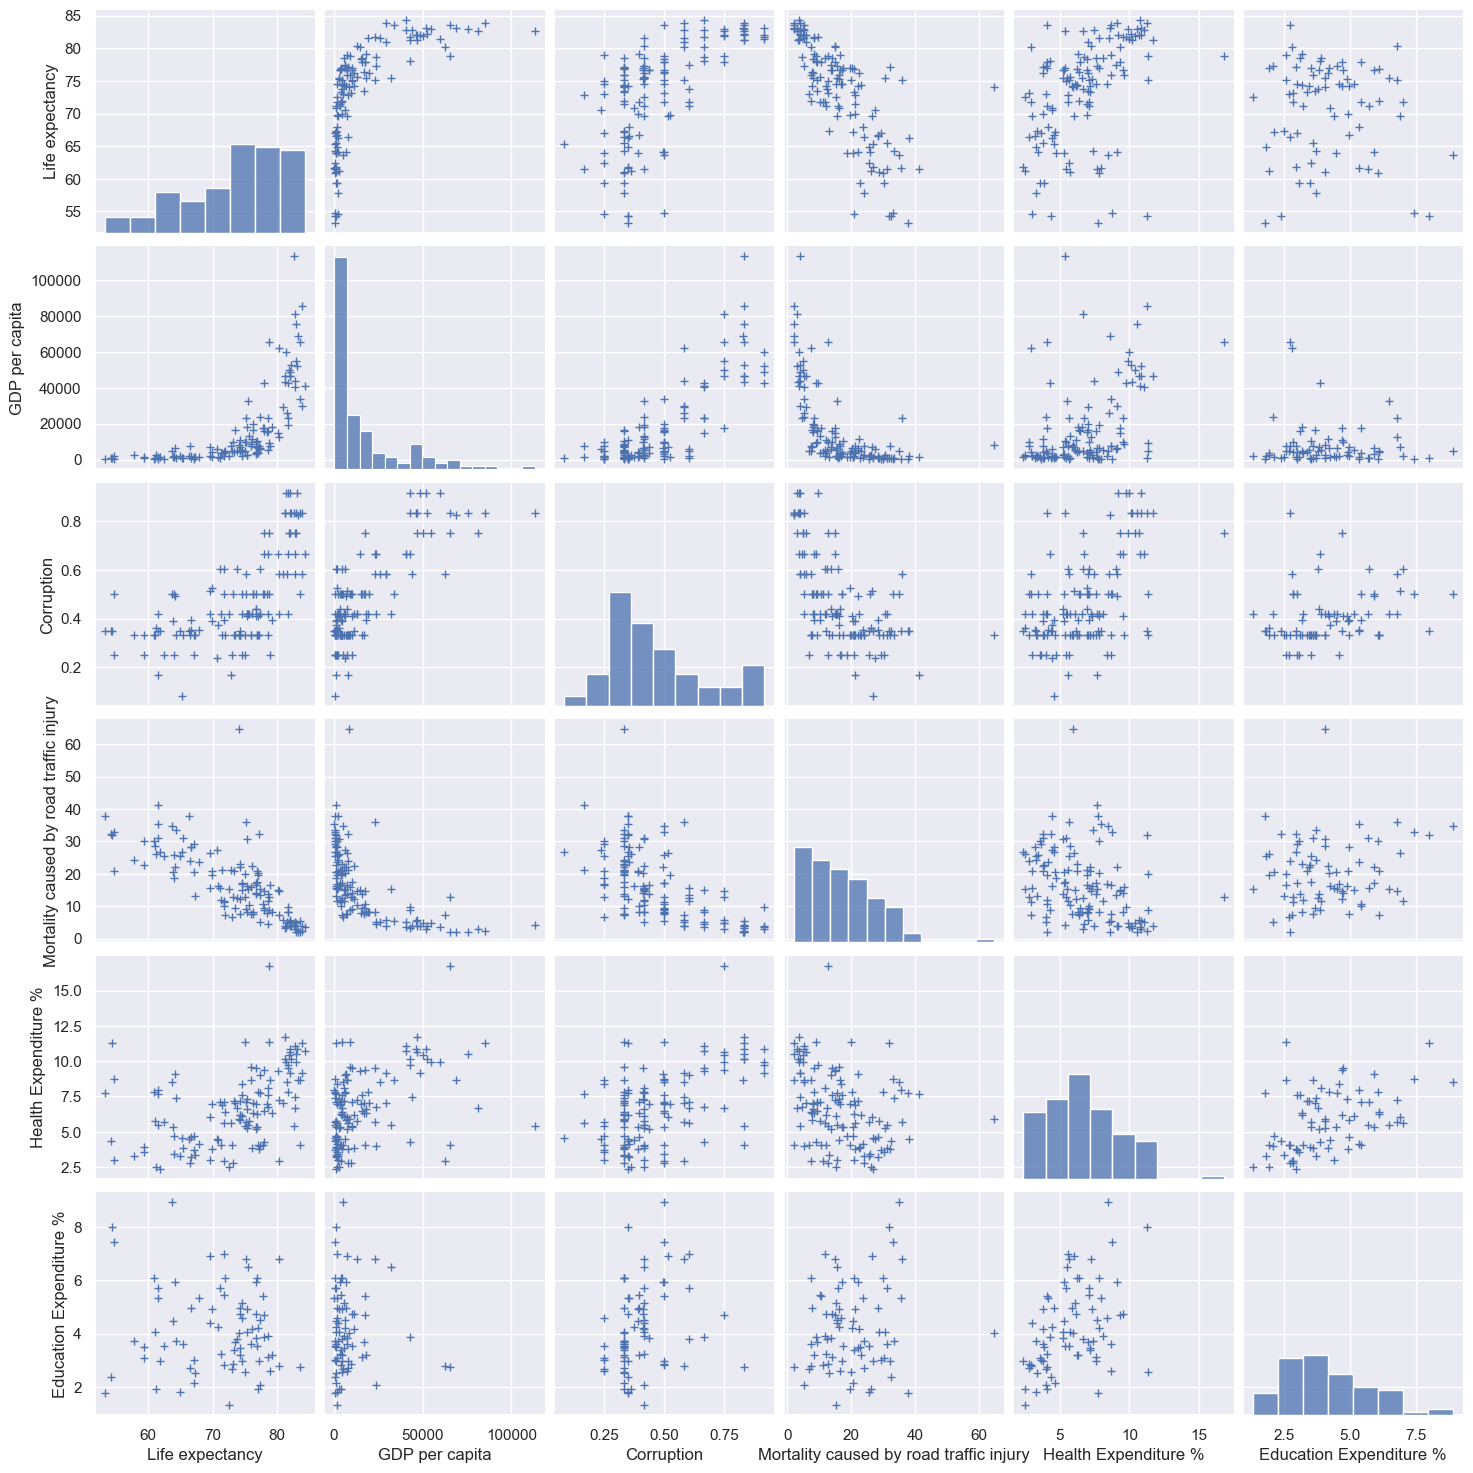

In [60]:
sns.set(rc={'figure.figsize':(8,8)})
sns.pairplot(df[numeric_cols],plot_kws=dict(marker="+", linewidth=1),palette="Paired")

C:\Users\octav\AppData\Local\Temp\ipykernel_36748\1464013260.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




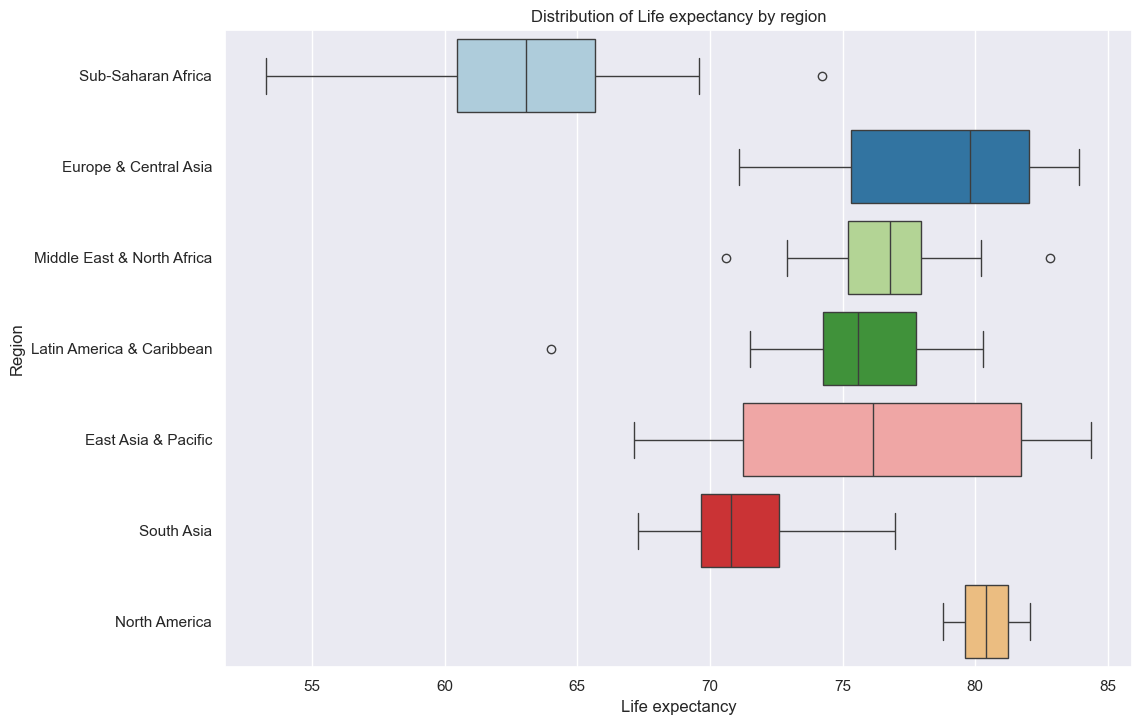

C:\Users\octav\AppData\Local\Temp\ipykernel_36748\1464013260.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




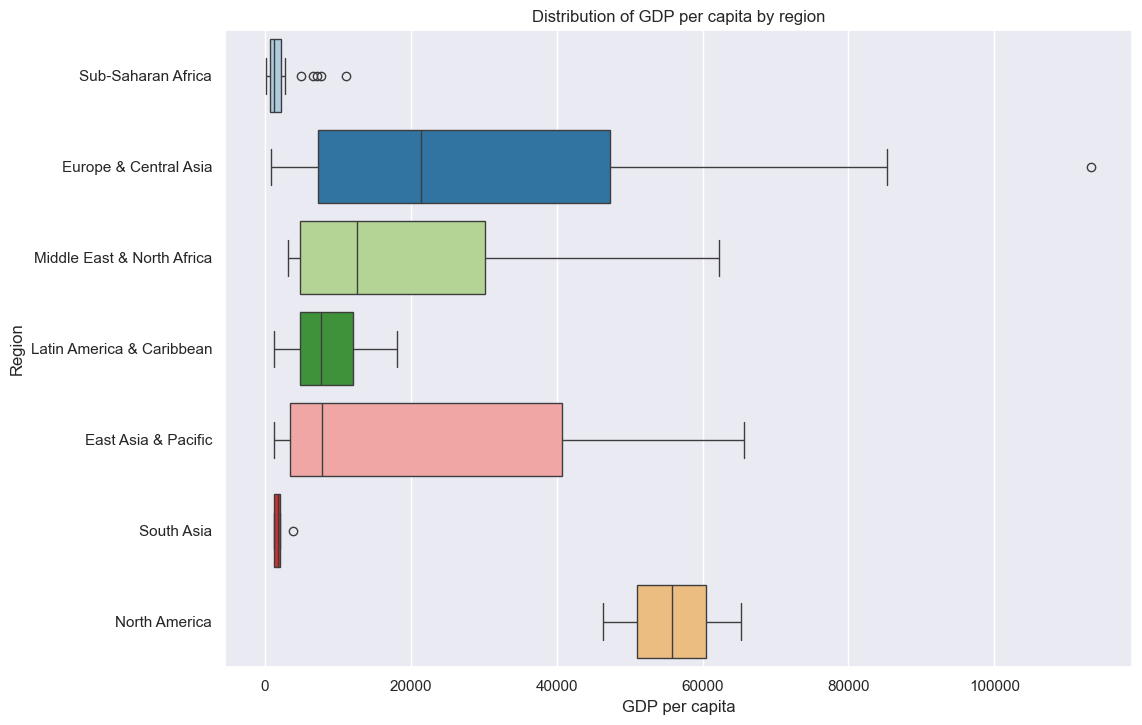

C:\Users\octav\AppData\Local\Temp\ipykernel_36748\1464013260.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




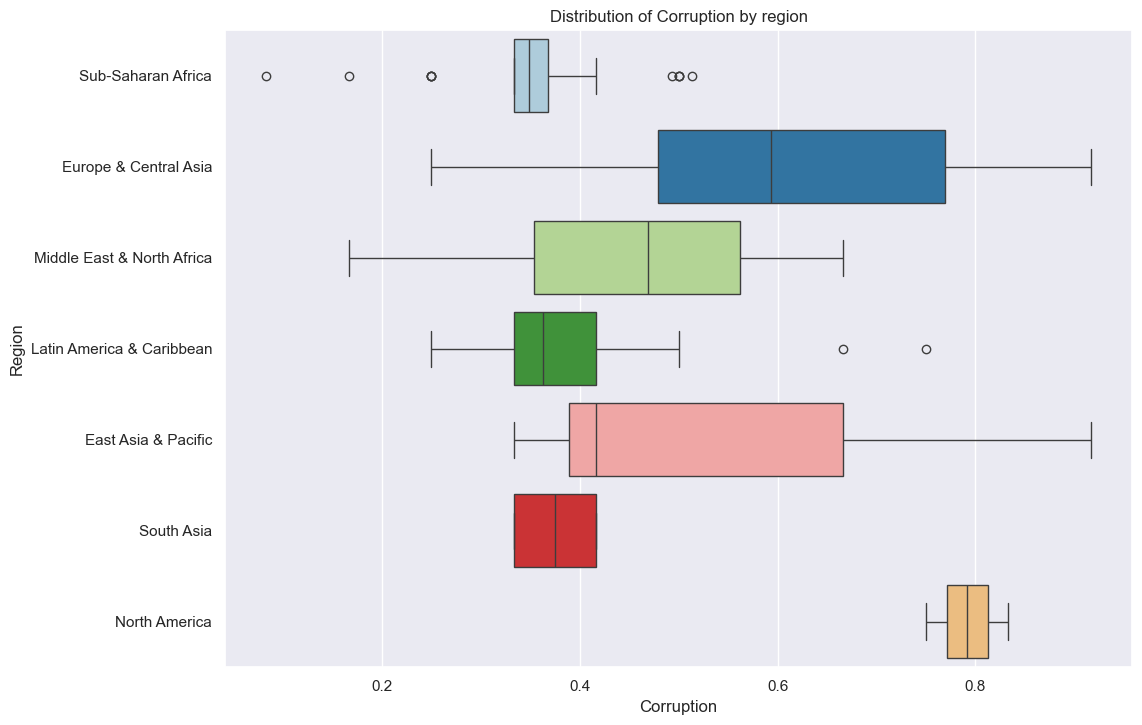

C:\Users\octav\AppData\Local\Temp\ipykernel_36748\1464013260.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




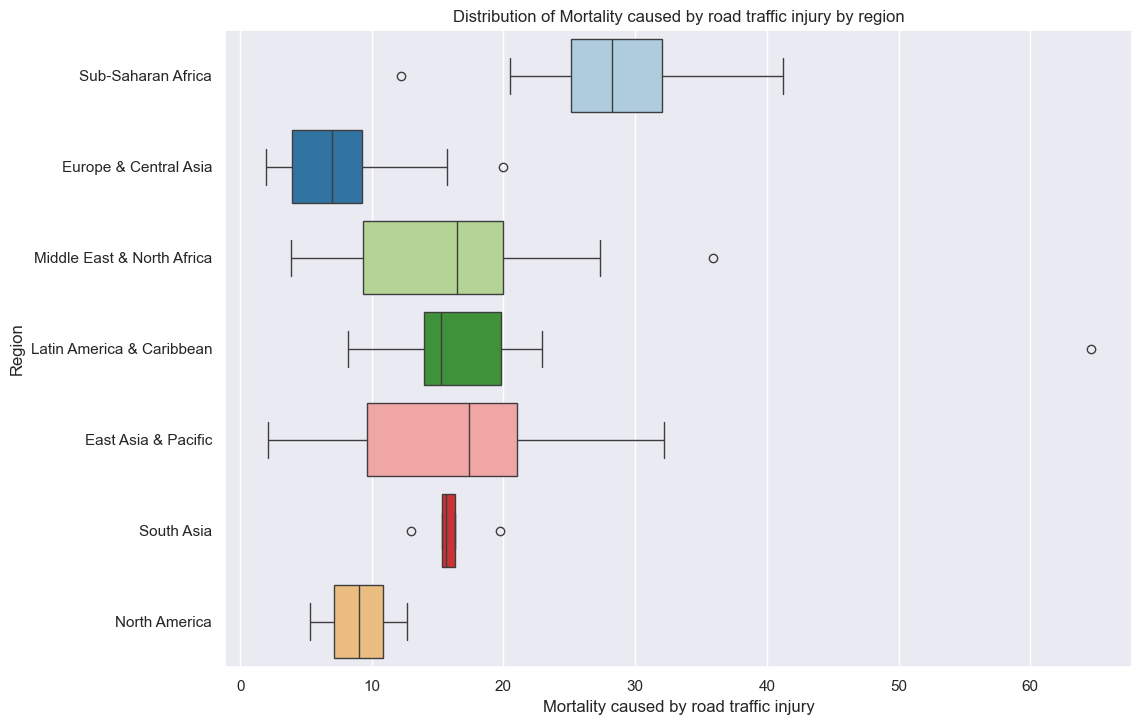

C:\Users\octav\AppData\Local\Temp\ipykernel_36748\1464013260.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




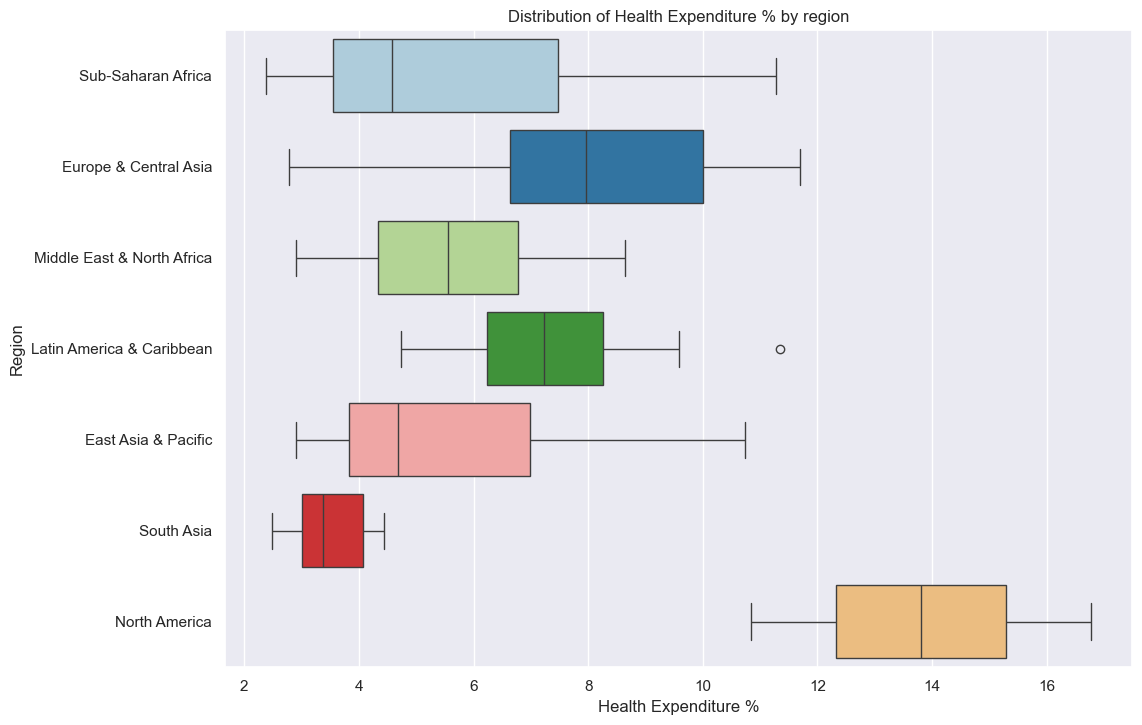

C:\Users\octav\AppData\Local\Temp\ipykernel_36748\1464013260.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




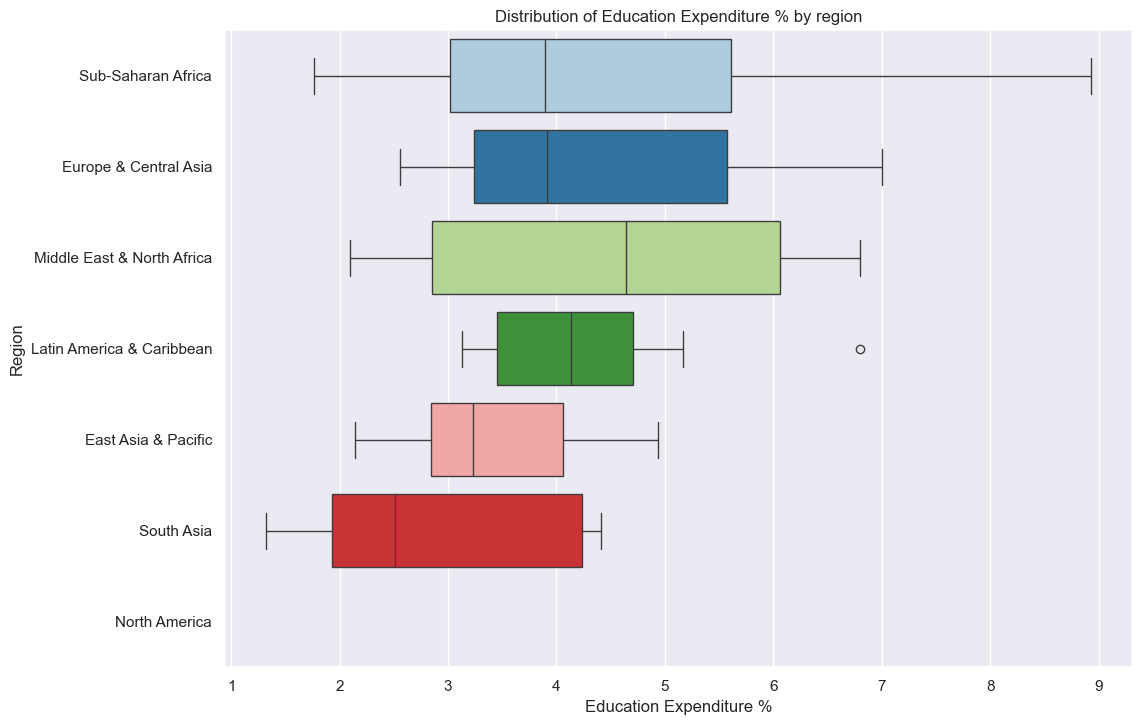

In [61]:
for column in numeric_cols:
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    g = sns.boxplot(data=df,palette='Paired',x=column,y='Region')
    g.set_title (f"Distribution of {column} by region")
    #g.set(xlabel='Proportion of missing values for each country')
    plt.show()

In [62]:
df[df['Country']=='Romania']

,Country,Country Code,Region,Life expectancy,GDP per capita,Corruption,Mortality caused by road traffic injury,Health Expenditure %,Education Expenditure %
103,Romania,ROU,Europe & Central Asia,75.607317,12899.346111,0.416667,10.3,5.744478,NaN


### Corelatii

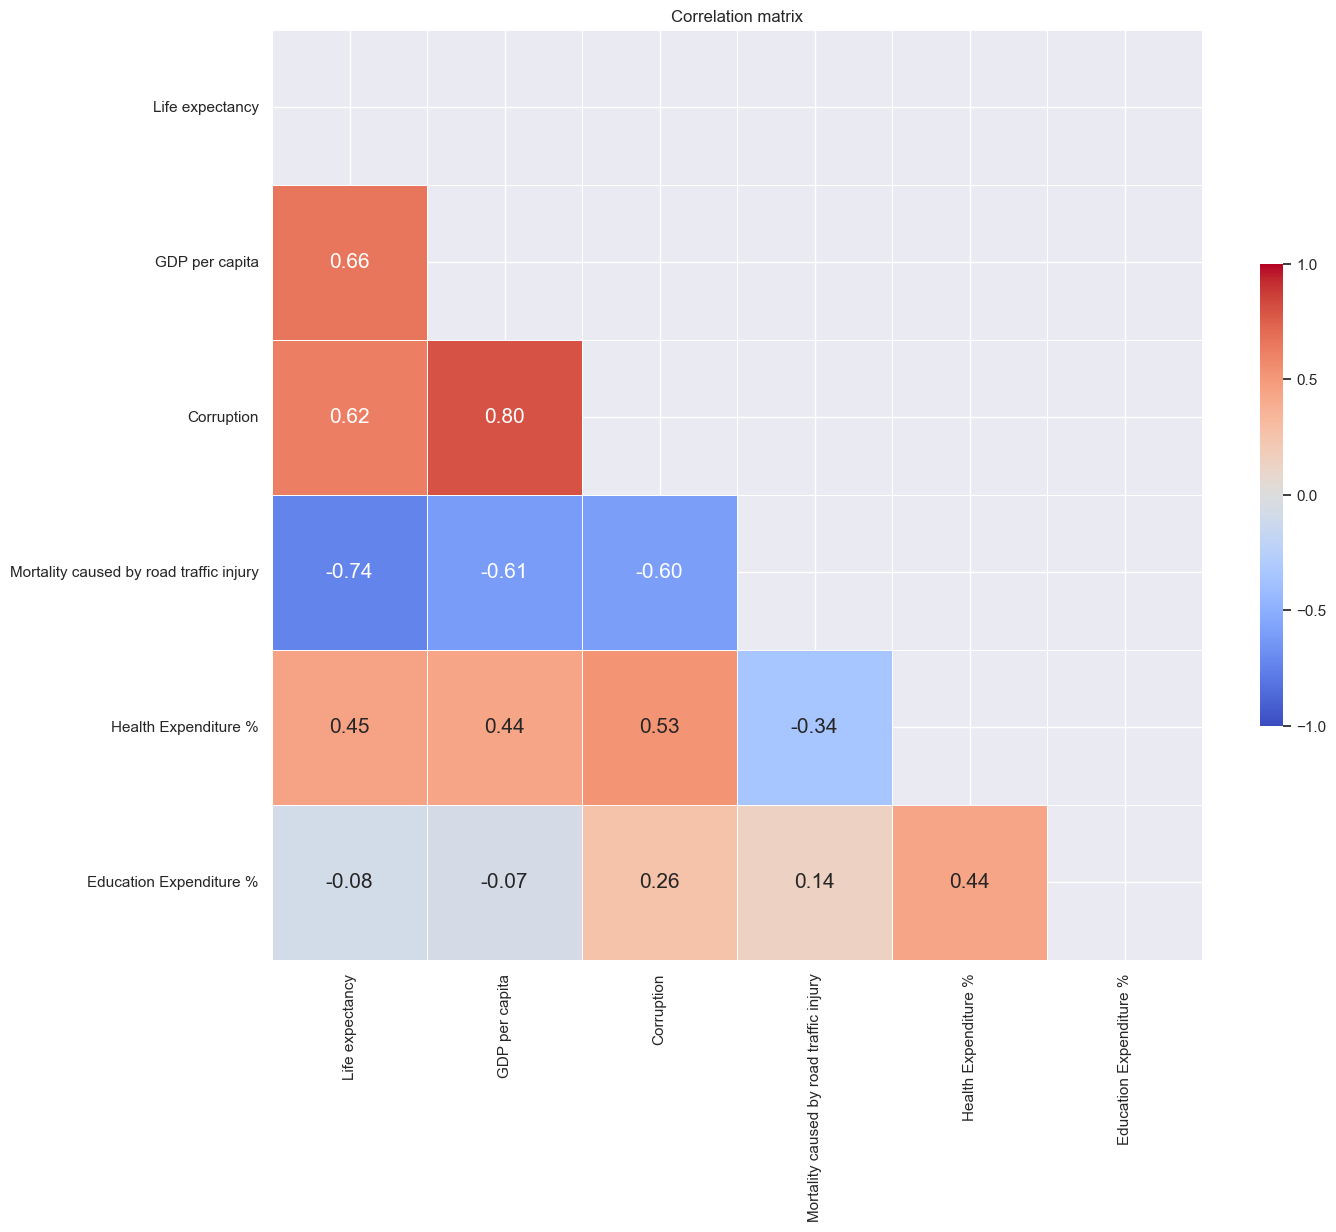

In [63]:
get_nice_corr_matrix(df[numeric_cols])

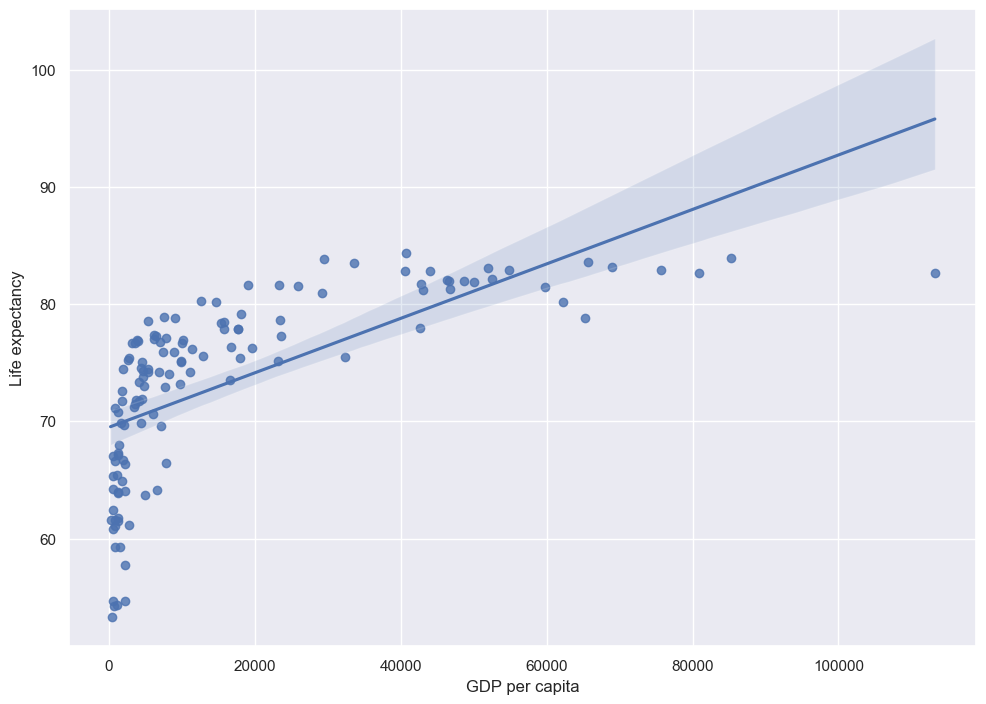

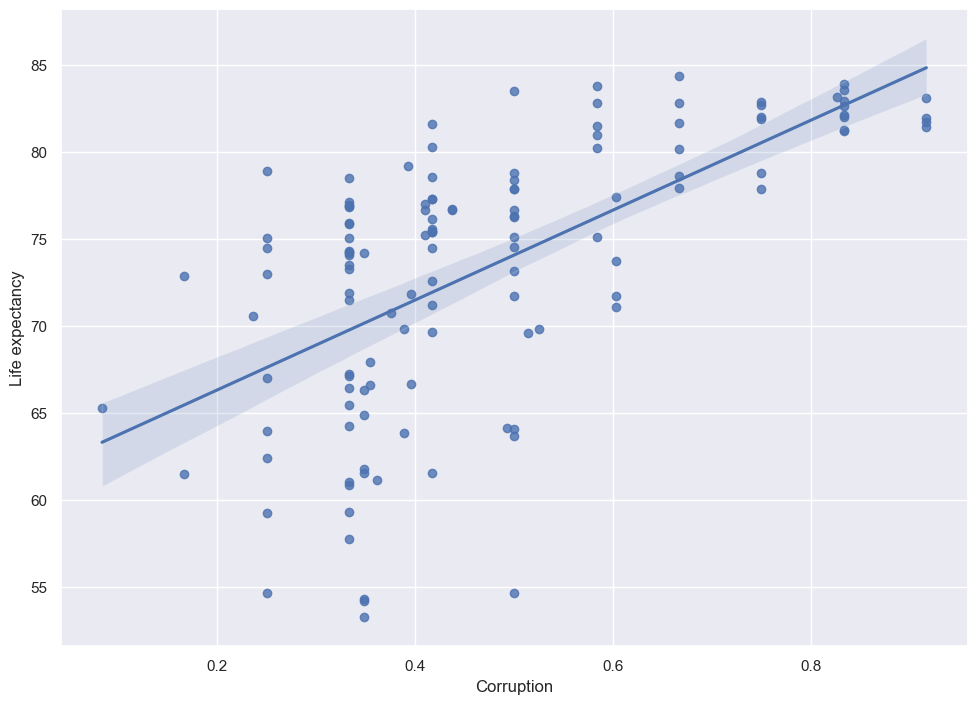

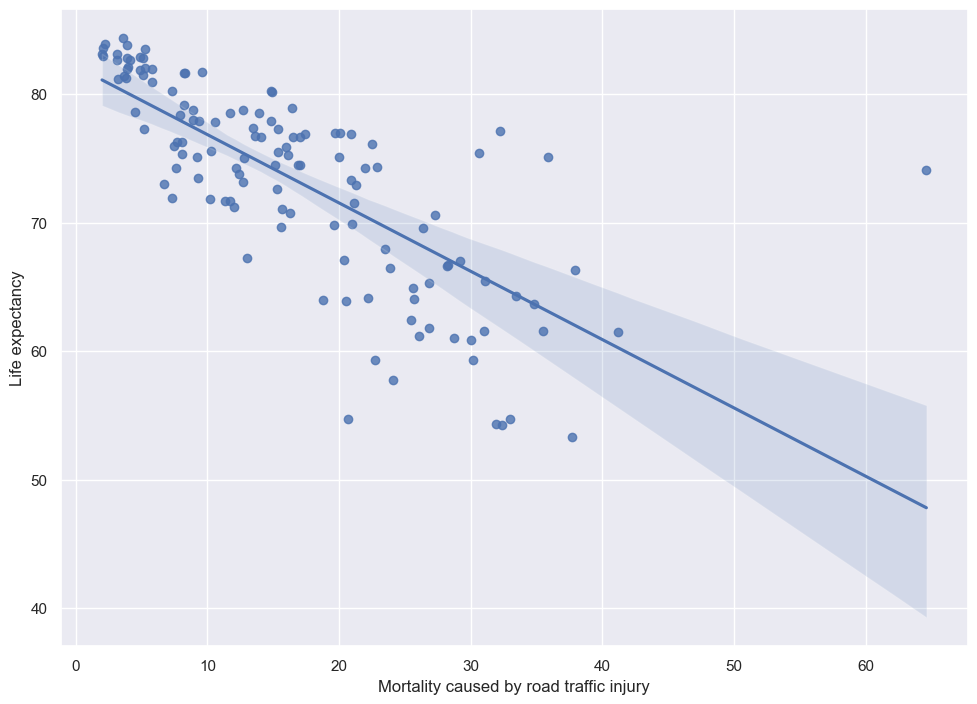

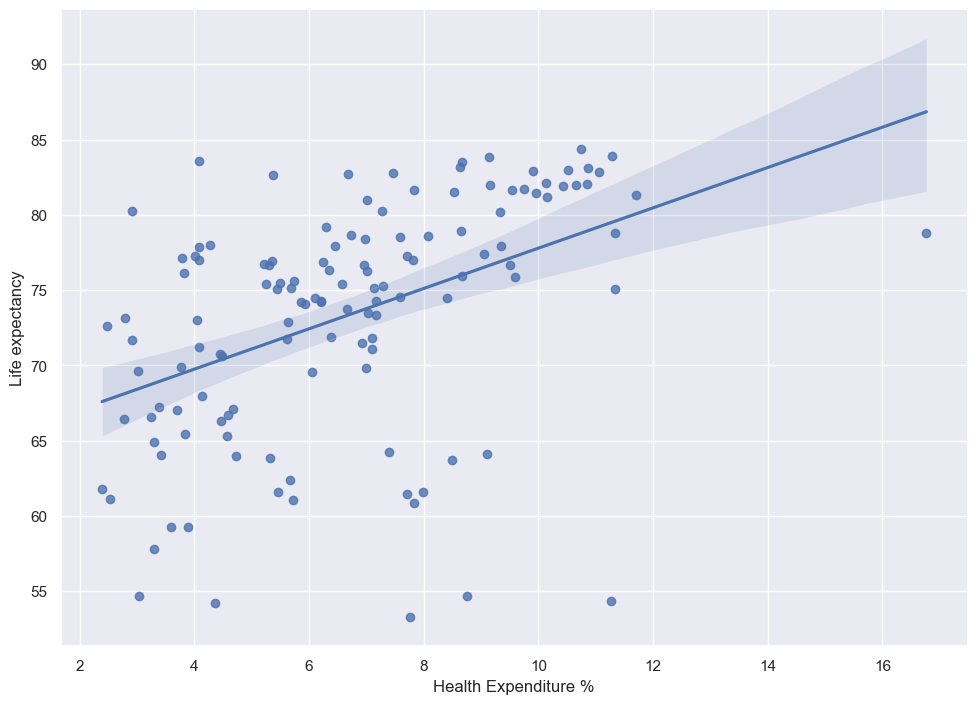

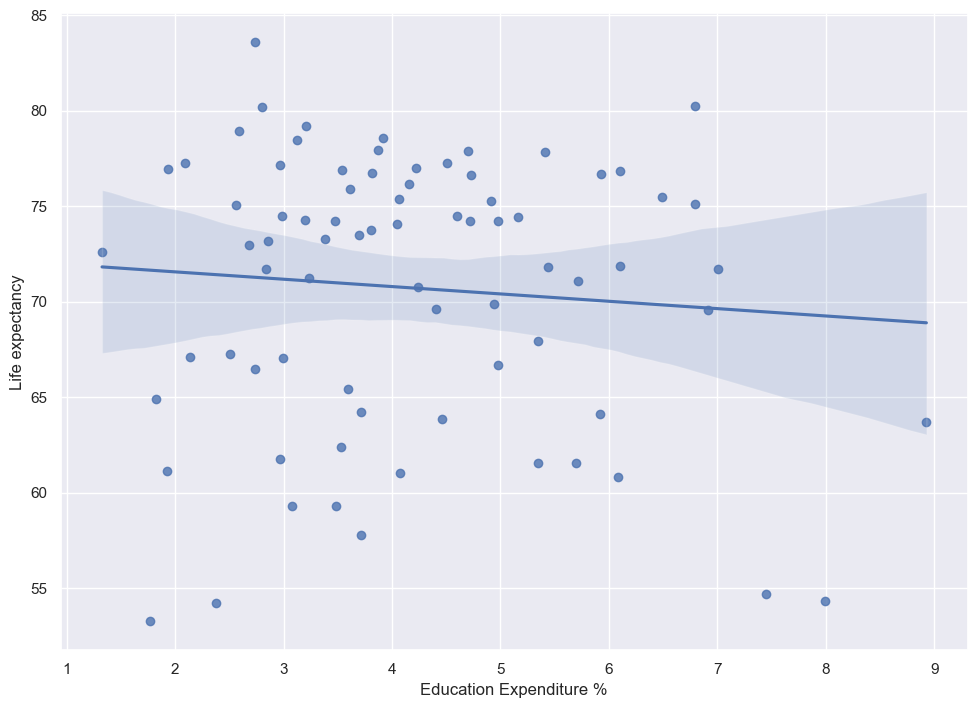

In [40]:
for x in numeric_cols:
    if x=='Life expectancy':
        continue
    sns.regplot(data=df, x=x,y='Life expectancy')
    
    plt.show()

### __Discutie__ despre feature engineering

__Discutie__ despre standardizare

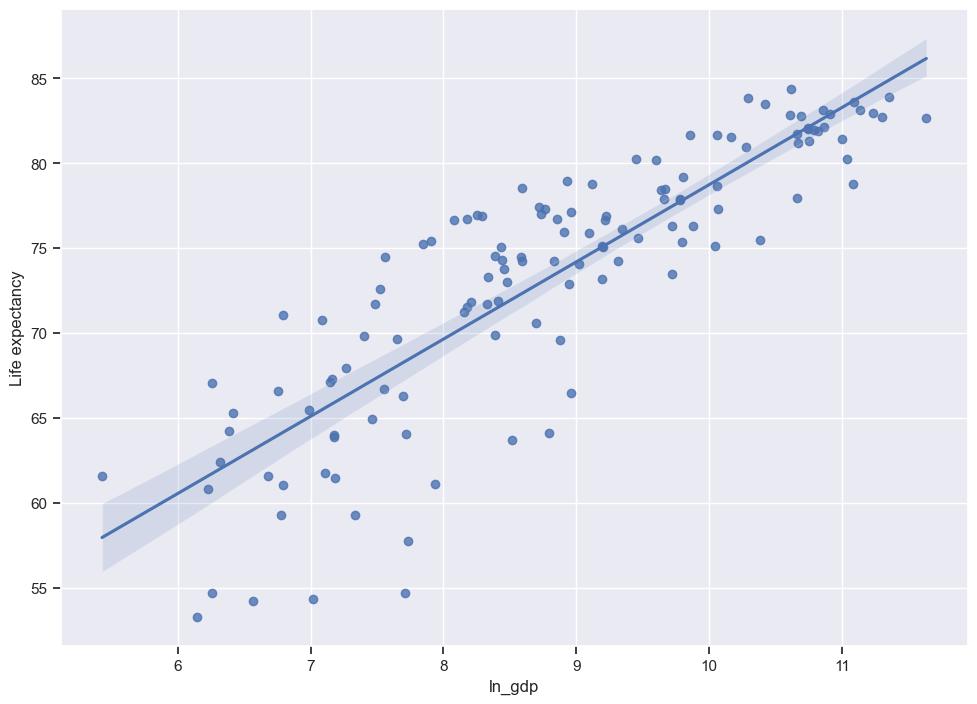

In [65]:
df['ln_gdp'] = np.log(df['GDP per capita'])
sns.regplot(data=df, x='ln_gdp',y='Life expectancy')
plt.show()

Inlocuim GDP per capita cu log(GDP per capita), castigam performanta mai buna a modelului, dar pierdem putin din interpretabilitate

# Estimare model liniar

In [66]:
import statsmodels.api as sm

X_cols = ['ln_gdp','Corruption',
 'Mortality caused by road traffic injury',
 'Health Expenditure %']

y_col = ['Life expectancy']

# Add constant term to independent variables
X = sm.add_constant(df[X_cols])

# Fit the model
model1 = sm.OLS(df[y_col], X).fit()

# Print model summary
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     105.1
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           1.03e-38
Time:                        20:49:59   Log-Likelihood:                -347.98
No. Observations:                 128   AIC:                             706.0
Df Residuals:                     123   BIC:                             720.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

#### __Discutie__ despre ce facem in continuare

* Enumerat solutii
* Interpretabilitate vs performanta

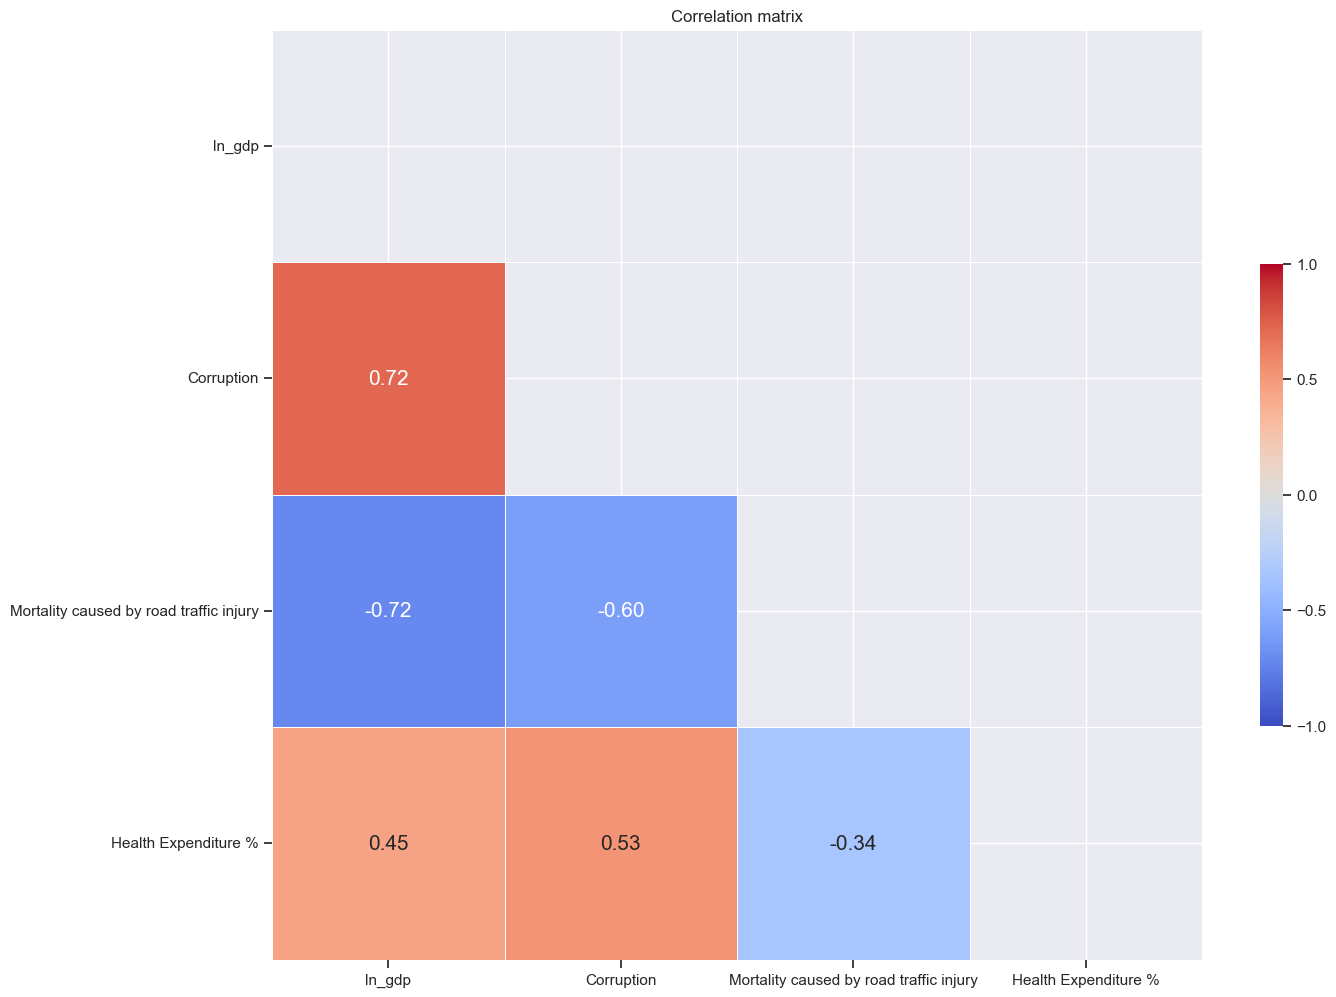

In [67]:
get_nice_corr_matrix(df[X_cols])

In [69]:

X_cols_v2 = ['ln_gdp',
 'Mortality caused by road traffic injury',
 'Health Expenditure %']

y_col = ['Life expectancy']

# Add constant term to independent variables
X = sm.add_constant(df[X_cols_v2])

# Fit the model
model2 = sm.OLS(df[y_col], X).fit()

# Print model summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     138.9
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           1.74e-39
Time:                        20:55:01   Log-Likelihood:                -348.79
No. Observations:                 128   AIC:                             705.6
Df Residuals:                     124   BIC:                             717.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [71]:
import statsmodels.api as sm

X_cols_v3 = ['ln_gdp',
 'Mortality caused by road traffic injury']

y_col = ['Life expectancy']

# Add constant term to independent variables
X = sm.add_constant(df[X_cols_v3])

# Fit the model
model3 = sm.OLS(df[y_col], X).fit()

# Print model summary
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     205.4
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           3.15e-40
Time:                        20:55:47   Log-Likelihood:                -349.91
No. Observations:                 128   AIC:                             705.8
Df Residuals:                     125   BIC:                             714.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

#### __Discutie__ despre indicatorii din summary

* R-squared - Cat din variatia lui y poate fi pusa pe seama variatiei lui X 
* F- statistic: Testeaza daca X, in aceasta forma, influenteaza Y. H0: toti beta sunt 0, H1: cel putin unul e semnificativ. P-value f f mic (0.05) => invatam ceva nou decat default action H0 => acceptam H1
* Log likelihood: valoarea rezultata din MLE, nu ne ajuta prea mult acum, eventual la comparare
* AIC / BIC: Information criteria, avand mai multe modele se poate compara care e mai bun
* Omnibus: Similar cu testul F
* Skew and Kurt: se refera la distributia erorilor
* Durbin Watson: ne spune daca erorile sunt autocorelate. Daca e in jur de 2, nu sunt autocorelate (sau f f putin)
* JB: Ne spune daca erorile sunt normal distribuite

Scrierea predictiilorsi erorilor

<Axes: xlabel='error', ylabel='Count'>

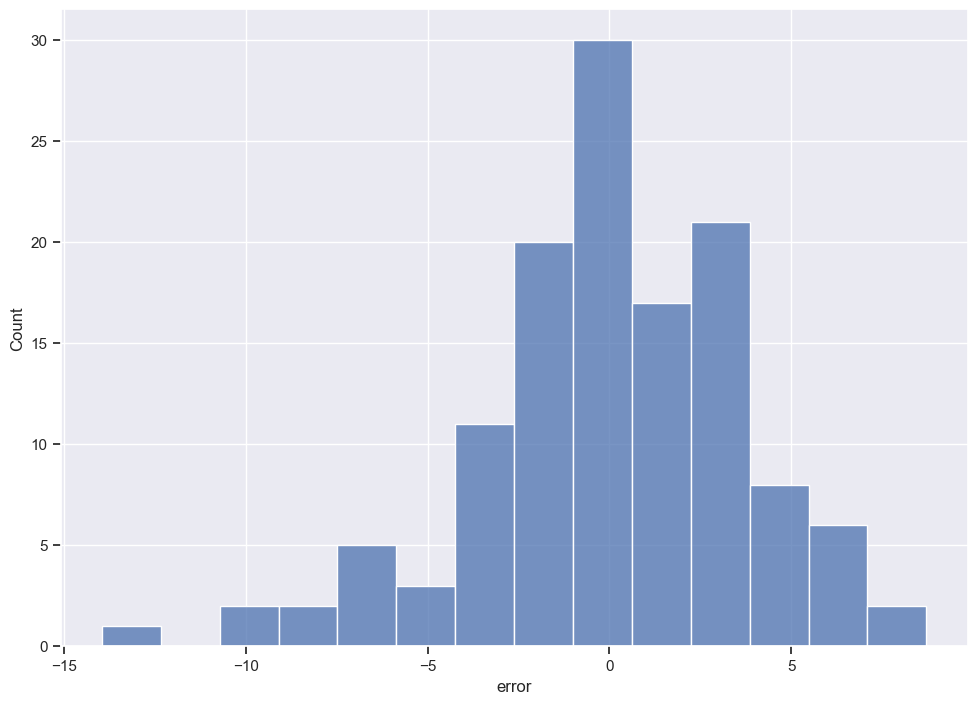

In [72]:
df['Life expectancy pred'] = model3.predict(X)
df['error'] = df['Life expectancy'] - df['Life expectancy pred']
sns.histplot(df['error'])

In [73]:
#set a baseline error
df['baseline pred'] = np.average(df['Life expectancy'])


In [74]:
#masuram cu cat s-a imbunatatit eroarea noului model vs baseline
from sklearn.metrics import mean_absolute_error

mape_baseline = mean_absolute_error(df['Life expectancy'], df['baseline pred'])
mape_model = mean_absolute_error(df['Life expectancy'], df['Life expectancy pred'])

print(f"Baseline MAPE: {mape_baseline}\nModel MAPE:{mape_model}")

Baseline MAPE: 6.2586470113614725
Model MAPE:2.8005317801473963


__Discutie__ despre testare. 

In sample, out of sample, train, test, validation

## Vizualizari model

In [75]:
df[['Life expectancy','ln_gdp','Mortality caused by road traffic injury']].head()


,Life expectancy,ln_gdp,Mortality caused by road traffic injury
0,61.147,7.940807,26.1
1,78.573,8.593350,11.7
2,77.972,10.661988,8.9
3,76.667,9.215988,14.1
4,75.087,8.434821,20.0


In [76]:
# # Create 3D plot
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # Plot scatter plot
# ax.scatter(df['Mortality caused by road traffic injury'], df['ln_gdp'], df['Life expectancy'], color='blue', label='Points')

# # Plot plane
# x1_grid, x2_grid = np.meshgrid(np.linspace(min(df['Mortality caused by road traffic injury']),
#                                             max(df['Mortality caused by road traffic injury']), 10),
#                                               np.linspace(min(df['ln_gdp']), max(df['ln_gdp']), 10))
# z2_plane = - model3.params[1] * x1_grid + model3.params[2] * x2_grid + model3.params[0]
# ax.plot_surface(x1_grid, x2_grid, z2_plane, alpha=0.5, color='orange', label='Plane')


# # Set labels and legend
# ax.set_xlabel('Mortality caused by road traffic injury')
# ax.set_ylabel('ln_gdp')
# ax.set_zlabel('Life expectancy')
# ax.set_title('3D Scatter Plot with Plane')
# ax.legend()
# plt.show()

In [77]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     205.4
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           3.15e-40
Time:                        20:56:00   Log-Likelihood:                -349.91
No. Observations:                 128   AIC:                             705.8
Df Residuals:                     125   BIC:                             714.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [78]:
import plotly.graph_objects as go
import numpy as np

# Example data

x = df['ln_gdp']
y = df['Mortality caused by road traffic injury']
z = df['Life expectancy']

# Create trace for scatter plot
scatter_trace = go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(color='blue', size=5), name='Points')

# Plot plane
x_grid, y_grid = np.meshgrid(np.linspace(min(x), max(x), 5), np.linspace(min(y), max(y), 5))
z2_plane = model3.params[0] + model3.params[1] * x_grid + model3.params[2] * y_grid 
plane_trace = go.Surface(x=x_grid, y=y_grid, z=z2_plane, opacity=0.5, colorscale='Oranges', name='Plane')

# Create layout for the plot
layout = go.Layout(scene=dict(xaxis=dict(title='ln_gdp'),
                               yaxis=dict(title='Mortality caused by road traffic injury'),
                               zaxis=dict(title='Life expectancy')),
                   margin=dict(l=0, r=0, b=0, t=0))

# Create figure
fig = go.Figure(data=[scatter_trace, plane_trace], layout=layout)

# Display the plot
fig.show()


C:\Users\octav\AppData\Local\Temp\ipykernel_36748\643661295.py:15: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [26]:
z2_plane

array([[64.57521026, 70.14480236, 75.71439446, 81.28398656, 86.85357866],
       [67.41694857, 72.98654067, 78.55613277, 84.12572487, 89.69531697],
       [70.25868688, 75.82827898, 81.39787108, 86.96746318, 92.53705528],
       [73.10042519, 78.67001729, 84.23960939, 89.80920149, 95.37879359],
       [75.94216349, 81.51175559, 87.08134769, 92.65093979, 98.22053189]])